In [3]:
import pandas as pd
import seaborn as sns

# Data loading

In [4]:
df=sns.load_dataset('iris')

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df=df[df['species']!='versicolor']

# information gathering

In [7]:
# checking dimensions 
df.shape

(100, 5)

In [8]:
df.count()

sepal_length    100
sepal_width     100
petal_length    100
petal_width     100
species         100
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.797000,3.201000,3.507000,1.136000
std,0.945319,0.417906,2.095221,0.918114
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,3.000000,1.500000,0.200000
50%,5.700000,3.200000,3.200000,1.000000
75%,6.500000,3.425000,5.525000,2.000000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [12]:
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,virginica
38,4.4,3.0,1.3,0.2,setosa
143,6.8,3.2,5.9,2.3,virginica
40,5.0,3.5,1.3,0.3,setosa


In [13]:
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Data cleaning

In [14]:
# checking duplicates

df.duplicated().sum()

np.int64(1)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
94,6.7,3.0,5.2,2.3,virginica
95,6.3,2.5,5.0,1.9,virginica
96,6.5,3.0,5.2,2.0,virginica
97,6.2,3.4,5.4,2.3,virginica


In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualisation

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:


x=df.iloc[:,:4]
y=df.iloc[:,4]

In [20]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [99 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 99, dtype: object)

<Axes: >

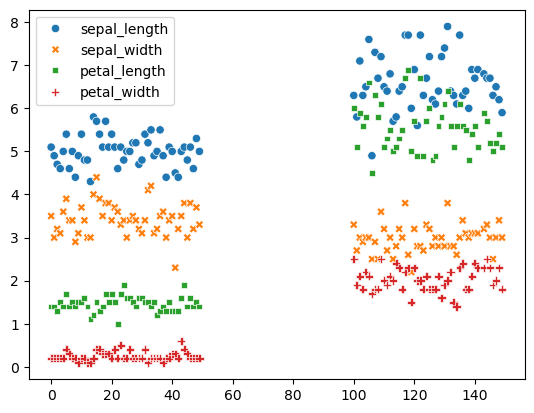

In [21]:
# creating scatter plot

sns.scatterplot(df)

<Axes: >

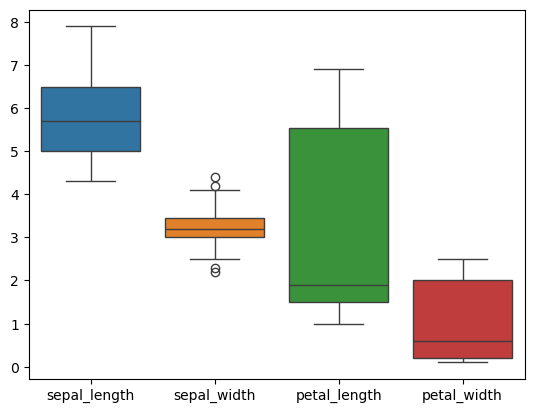

In [22]:
# creating boxplot

sns.boxplot(x)

<Axes: ylabel='sepal_width'>

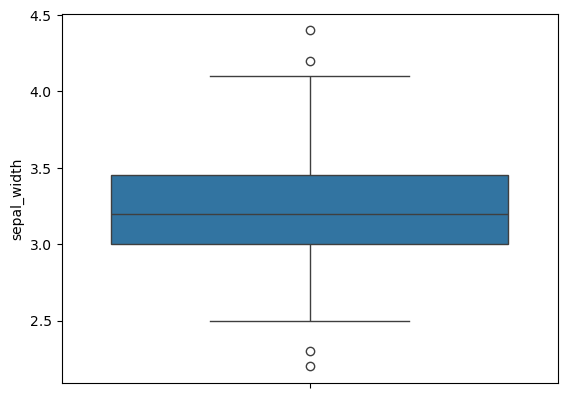

In [23]:
sns.boxplot(x.iloc[:,1])

<Axes: xlabel='sepal_length', ylabel='petal_length'>

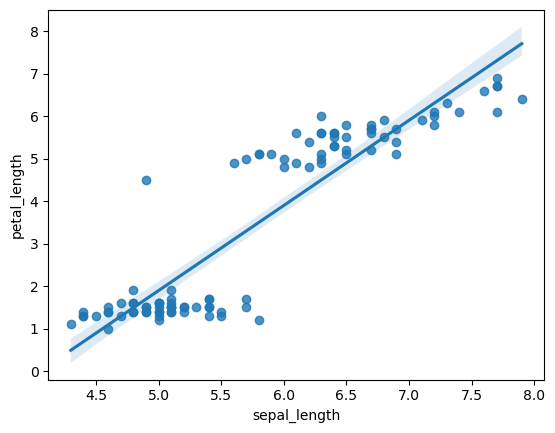

In [24]:
sns.regplot(x='sepal_length',y='petal_length',data=df)

<Axes: >

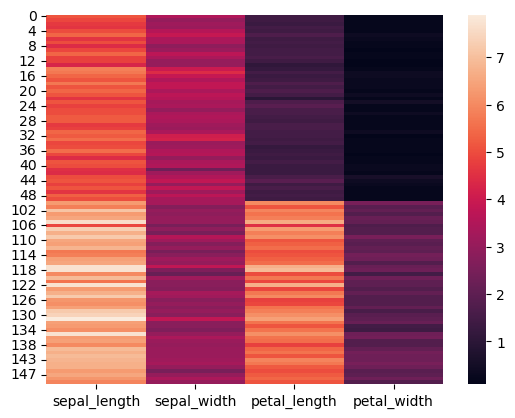

In [25]:
# creating heatmap
sns.heatmap(x)

In [26]:
import numpy as np

# checking for outlier

In [27]:
# function to check for outliers
def handle_outlier(column):
    q1=df[column].quantile(.25)
    q3=df[column].quantile(.75)
    iqr=q3-q1

    lower_range=q1-(1.5 iqr)
    upper_range=q3+(1.5 iqr)

    return  df[(df[column]<lower_range) & (df[column]>upper_range)]

In [28]:
handle_outlier('sepal_width')

,sepal_length,sepal_width,petal_length,petal_width,species


In [29]:
df.count()

sepal_length    99
sepal_width     99
petal_length    99
petal_width     99
species         99
dtype: int64

In [30]:
df.species.unique()

array(['setosa', 'virginica'], dtype=object)

In [31]:
# data transformation

df['species']=df['species'].map({'virginica':0,'setosa':1})

# Train test split

In [32]:
# spliting data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=.2)

# making model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# training model

lr=LogisticRegression()
lr.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
# predicting

y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

1.0

In [36]:
# 9085792494774949 - when test size is .2 
# 9086544902864333 - when test size is .3
# 0.8487119973053087 -when test size is .35

In [37]:
lr.predict([[5.1,3.5,1.4,0.2]])

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [38]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [45]:
# table of comparison

results = pd.DataFrame({
    'Model': 'LogisticRegression',
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head(5))

                  Model     Actual  Predicted
41   LogisticRegression     setosa     setosa
138  LogisticRegression  virginica  virginica
129  LogisticRegression  virginica  virginica
6    LogisticRegression     setosa     setosa
128  LogisticRegression  virginica  virginica


In [64]:
import pandas as pd

# Table 1
df1 = pd.DataFrame({
    "Actual": ["setosa", "virginica", "virginica"],
    "Predicted": ["setosa", "virginica", "virginica"]
})

# Table 2
df2 = pd.DataFrame({
    "Actual": ["versicolor", "setosa", "versicolor"],
    "Predicted": ["versicolor", "setosa", "versicolor"]
})

# Table 3
df3 = pd.DataFrame({
    "Actual": ["versicolor", "versicolor", "virginica"],
    "Predicted": ["versicolor", "versicolor", "virginica"]
})

# Table 4
df4 = pd.DataFrame({
    "Actual": ["setosa", "setosa", "setosa"],
    "Predicted": ["setosa", "setosa", "setosa"]
})

# Table 5
df5 = pd.DataFrame({
    "Actual": [129, 175, 162],
    "Predicted": [129.254120, 174.605012, 162.511441]
})

Table = pd.DataFrame({
    "Model": [
        'Logistic Regression',
        'Binary classification 1',
        'Binary classification 2',
        'Binary classification 3',
        'Linear regression'
    ],
    "Accuracy": [
        1*100,1*100,1*100,1*100,.9995*100
        
    ],
    "Actual 1": [
        df1.iloc[0]["Actual"],
        df2.iloc[0]["Actual"],
        df3.iloc[0]["Actual"],
        df4.iloc[0]["Actual"],
        df5.iloc[0]["Actual"]
    ],
    "Predicted 1": [
        df1.iloc[0]["Predicted"],
        df2.iloc[0]["Predicted"],
        df3.iloc[0]["Predicted"],
        df4.iloc[0]["Predicted"],
        df5.iloc[0]["Predicted"]
    ],
    "Actual 2": [
        df1.iloc[1]["Actual"],
        df2.iloc[1]["Actual"],
        df3.iloc[1]["Actual"],
        df4.iloc[1]["Actual"],
        df5.iloc[1]["Actual"]
    ],
    "Predicted 2": [
        df1.iloc[1]["Predicted"],
        df2.iloc[1]["Predicted"],
        df3.iloc[1]["Predicted"],
        df4.iloc[1]["Predicted"],
        df5.iloc[1]["Predicted"]
    ],
    "Actual 3": [
        df1.iloc[2]["Actual"],
        df2.iloc[2]["Actual"],
        df3.iloc[2]["Actual"],
        df4.iloc[2]["Actual"],
        df5.iloc[2]["Actual"]
    ],
    "Predicted 3": [
        df1.iloc[2]["Predicted"],
        df2.iloc[2]["Predicted"],
        df3.iloc[2]["Predicted"],
        df4.iloc[2]["Predicted"],
        df5.iloc[2]["Predicted"]
    ]
})

Table


,Model,Accuracy,Actual 1,Predicted 1,Actual 2,Predicted 2,Actual 3,Predicted 3
0,Logistic Regression,100.00,setosa,setosa,virginica,virginica,virginica,virginica
1,Binary classification 1,100.00,versicolor,versicolor,setosa,setosa,versicolor,versicolor
2,Binary classification 2,100.00,versicolor,versicolor,versicolor,versicolor,virginica,virginica
3,Binary classification 3,100.00,setosa,setosa,setosa,setosa,setosa,setosa
4,Linear regression,99.95,129.0,129.25412,175.0,174.605012,162.0,162.511441
